In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as st
%matplotlib inline

In [99]:
sns.set(rc={'figure.figsize':(14,8)})

In [100]:
data = pd.read_csv('posterior_gdpInfantMortality.csv')
posteriors=pd.read_csv('posterior_posteriorsGdpInfantMortality.csv')

In [101]:
data.dropna(inplace=True)
data.rename(columns={'infant.mortality':'im'}, inplace=True)

In [102]:
X2=pd.DataFrame(np.log(data.gdp))
y2=np.log(data.im)

In [103]:
data.head()

,Unnamed: 0,im,gdp
0,Afghanistan,154.0,2848.0
1,Albania,32.0,863.0
2,Algeria,44.0,1531.0
5,Angola,124.0,355.0
6,Antigua,24.0,6966.0


In [104]:
posteriors.corr()

,alpha,beta,sigma
alpha,1.000000,-0.976526,-0.017695
beta,-0.976526,1.000000,0.016579
sigma,-0.017695,0.016579,1.000000


## The priors distributions are: ##
$$ \LARGE{ \alpha \sim \mathcal{N} (0,10) \\ \beta \sim \mathcal{N} (0,10) \\ \sigma \sim \mathcal{N} (0,5), \sigma \geq 0} $$

In [149]:
alphas = np.random.normal(loc=0,scale=10, size=193)
betas = np.random.normal(loc=0,scale=10, size=193)
sigmas = st.halfnorm.rvs(loc=0, scale=5, size=193)

In [150]:
prior_preds=np.random.normal(loc=alphas+betas*X2.gdp, scale=sigmas)

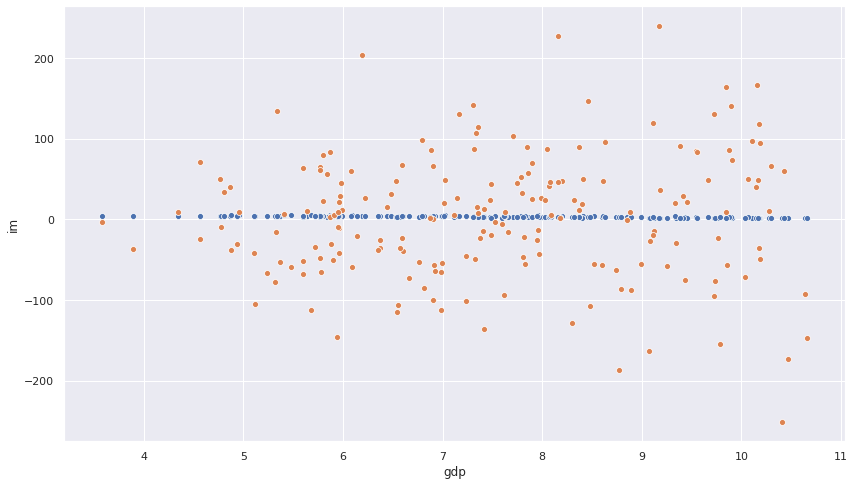

In [151]:
sns.scatterplot(X2.gdp,y2)
sns.scatterplot(X2.gdp, prior_preds)

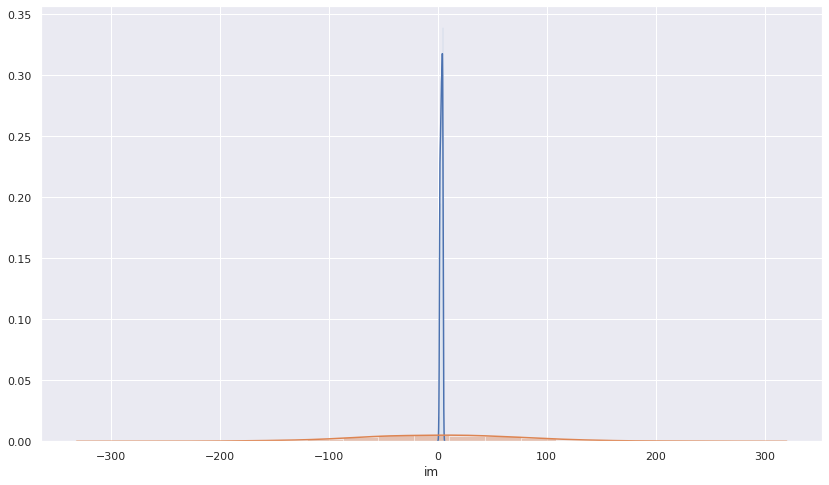

In [152]:
sns.distplot(y2)
sns.distplot(prior_preds)

In [154]:
palphas=np.random.choice(posteriors.alpha, 193, replace=False)
pbetas=np.random.choice(posteriors.beta, 193, replace=False)
psigmas=np.random.choice(posteriors.sigma, 193, replace=False)

In [155]:
posterior_preds=np.random.normal(loc=palphas+pbetas*X2.gdp, scale=psigmas)

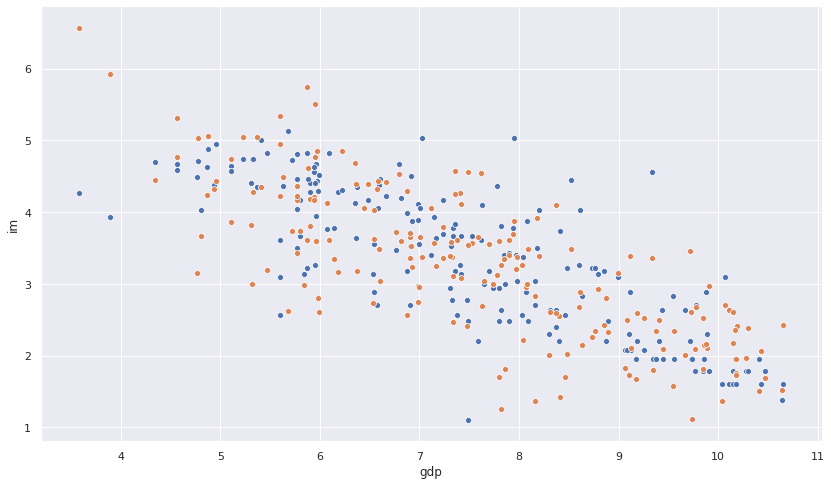

In [156]:
sns.scatterplot(X2.gdp,y2)
sns.scatterplot(X2.gdp, posterior_preds)

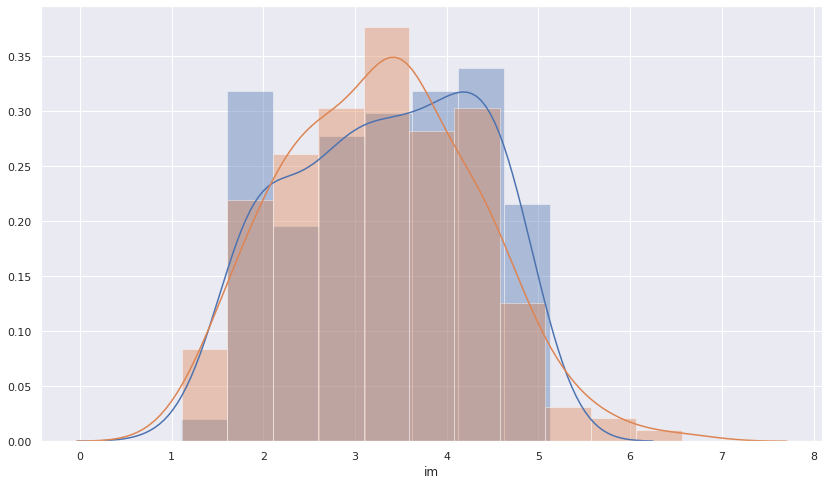

In [157]:
sns.distplot(y2)
sns.distplot(posterior_preds)